## Flower Classification Project 
This is a multi-classification task for classifying flowers, an exercise from Udacity's Tensorflow Convolutional Neural Networks course.

### Setting up the environment

In [1]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pwd

/content


### Importing requisite packages

In [3]:
import os 
import shutil 
import glob 
import numpy as np
import json
import PIL
import matplotlib.pyplot as plt
import matplotlib.image as mpimage 
import tensorflow as tf
import warnings 
warnings.filterwarnings("ignore")

In [5]:
## Checking if GPU is enabled
print(tf.test.is_gpu_available())

True


# Data Preparation

### Downloading Dataset

In order to build this flower image classifier, we need to download the required image dataset. This dataset was gotten from the Udacity Tensorflow introduction course. 

The flower image dataset  contains images of 5 types of flowers:

1. Rose
2. Daisy
3. Dandelion
4. Sunflowers
5. Tulips

In [6]:
## Downloading the Udacity flower classification dataset using Keras get_file() utility
## Reference :- https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file

DATASET_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

download_path = tf.keras.utils.get_file(
    origin = DATASET_URL,
    fname = "flower_photos.tgz",
    untar = True
)

228818944/228813984 [==============================] - 1s 0us/step


In [7]:
print(download_path)

/root/.keras/datasets/flower_photos.tgz


In [8]:
DOWNLOADED_DATASET_DIR = os.path.join(os.path.dirname(download_path), "flower_photos")

In [9]:
print(os.listdir(DOWNLOADED_DATASET_DIR))

['dandelion', 'sunflowers', 'LICENSE.txt', 'roses', 'daisy', 'tulips']


In [10]:
classes = ['dandelion', 'sunflowers', 'roses', 'daisy', 'tulips']

In [11]:
for cls in classes:
  print(f"{cls} - {len(os.listdir(os.path.join(DOWNLOADED_DATASET_DIR, cls)))} images.")

dandelion - 898 images.
sunflowers - 699 images.
roses - 641 images.
daisy - 633 images.
tulips - 799 images.


In [12]:
## Exploratory data analysis 
x = classes 
y = list(map(lambda x: len(os.listdir(os.path.join(DOWNLOADED_DATASET_DIR, x))), classes))

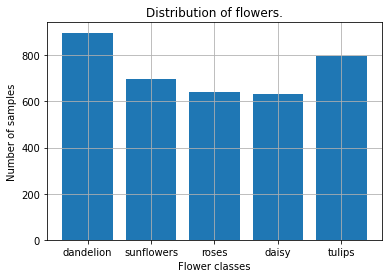

In [13]:
plt.bar(x, y)
plt.grid()
plt.title("Distribution of flowers.")
plt.xlabel("Flower classes")
plt.ylabel("Number of samples")
plt.show()

### Splitting dataset into Train, Validation and Test

In [14]:
TRAIN_RATIO = 0.8
VALIDATION_RATIO = 0.15
TEST_RATIO = 0.05

for cls in classes:
  os.makedirs(os.path.join(DOWNLOADED_DATASET_DIR, "train", cls))
  os.makedirs(os.path.join(DOWNLOADED_DATASET_DIR, "val", cls))
  os.makedirs(os.path.join(DOWNLOADED_DATASET_DIR, "test", cls))

In [15]:
for cls in classes:
  images_path = os.path.join(DOWNLOADED_DATASET_DIR, cls)
  allClassImages = glob.glob(images_path + "/*.jpg")
  
  # Shuffle the images
  np.random.shuffle(allClassImages)

  trainImages, valImages, testImages = np.split(
      np.array(allClassImages),
      [int(len(allClassImages)*(1-(VALIDATION_RATIO+TEST_RATIO))), int(len(allClassImages)*(1-TEST_RATIO))]
  )

  for img in trainImages:
    shutil.move(img, os.path.join(DOWNLOADED_DATASET_DIR, 'train', cls))
  for img in valImages:
    shutil.move(img, os.path.join(DOWNLOADED_DATASET_DIR, 'val', cls))
  for img in testImages:
    shutil.move(img, os.path.join(DOWNLOADED_DATASET_DIR, 'test', cls))

In [18]:
os.listdir(DOWNLOADED_DATASET_DIR)

['dandelion',
 'test',
 'sunflowers',
 'LICENSE.txt',
 'val',
 'roses',
 'daisy',
 'train',
 'tulips']

In [19]:
# Move the data to your working directory 
WORKING_DIRECTORY = "/content/drive/My Drive/Tensorflow Primer"

# Create a dataset folder in your working directory for this to work
for _ in ["train","test","val"]:
  shutil.move(os.path.join(DOWNLOADED_DATASET_DIR,_), os.path.join(WORKING_DIRECTORY,"dataset"))